## 試用老師的函式庫

In [1]:
!pip install onnxruntime #for gpu version: onnxruntime-gpu
!pip install https://github.com/htylab/tigerbx/archive/release.zip

  Using cached https://github.com/htylab/tigerbx/archive/release.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import tigerbx
import glob
maskffs =  glob.glob('/NFS/norm/dataset/aseg_data/T1w_raw/*T1w_raw.nii.gz')
print(maskffs[2])
# tigerbx.run('ap', maskffs[1], r'.')

/NFS/norm/dataset/aseg_data/T1w_raw/PPMI_3573_I423733_T1w_raw.nii.gz


In [1]:
!pwd

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/home/jupyter/norm


In [4]:
! pip install torchio

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 kB 2.8 MB/s eta 0:00:00a 0:00:01


In [19]:
# label_to_image
import numpy as np
import os, random
import torchio as tio

def get_image(label):
    index_all = np.unique(label)    # number of classes
    gen_ima = label * 0             # initialize the 3d matrix with 0
    for ii in index_all:             
        mu = random.random()
        sigma = random.random()*0.05 # mean and standard deviation
        len1 = np.sum(label==ii)     # number of voxels in a class
        gen_ima[label==ii] = np.random.normal(mu , sigma, len1) # fill in the value
    return gen_ima

def get_ima_aug(label):
    gen_ima = get_image(label)
    data = dict()
    data['ima'] = gen_ima[None, ...]
    data['label'] = label[None, ...]
    temp = data
    # scale 0.9 <-> 1.1
    # degree -10 <-> +10
    # padding minimum
    # img interpolation linear
    # img interpolation nearest
    temp = tio.RandomAffine(label_keys='label', include=['ima', 'label'])(temp)
    # num control points 7 7 7
    # max displacement 7.5
    if random.random() > 0.3: temp = tio.RandomElasticDeformation(label_keys='label', include=['ima', 'label'])(temp)
    # axis 0 1 2
    # downsample factor 1.5 <-> 5
    if random.random() > 0.5: temp = tio.RandomAnisotropy(label_keys='label', include=['ima', 'label'], scalars_only=True)(temp)
    # degree -10 <-> 10
    # motion 最大位移 -10 <-> 10
    if random.random() > 0.9: temp = tio.RandomMotion(label_keys='label', include=['ima', 'label'])(temp)
    # 重影
    # num_ghosts 4 <-> 10
    # axis 0 1 2
    # ghost intensity 0.5 <-> 1.0
    if random.random() > 0.9: temp = tio.RandomGhosting(label_keys='label', include=['ima', 'label'])(temp)
    # out = A * in^(gamma)
    temp = tio.RandomGamma(label_keys='label', include=['ima', 'label'])(temp)
    # Gaussian noise
    # mean 0   std 0 <-> 0.25
    temp = tio.RandomNoise(label_keys='label', include=['ima', 'label'])(temp)
    # coef 0.5
    # order 3
    temp = tio.RandomBiasField(label_keys='label', include=['ima', 'label'])(temp)
    # Gaussian filter size 0 <-> 2
    temp = tio.RandomBlur(label_keys='label', include=['ima', 'label'], std=0.5)(temp)

    return temp['ima'][0, ...].numpy(), temp['label'][0, ...].numpy()

label = np.array([[[1,2],[0,2]],[[1,2],[0,2]]])

print((get_ima_aug(label)[0]).shape)

(2, 2, 2)


In [1]:
import os

# 定义路径组件
folder = "my_folder"
subfolder = "subfolder"
file = "example.txt"

# 使用 os.path.join() 连接路径组件
full_path = os.path.join(folder, subfolder, file)

# 打印连接后的路径
print(full_path)

my_folder/subfolder/example.txt


In [3]:
from PIL import Image
import numpy as np

# 创建一个示例的NumPy数组
data = np.random.randint(0, 256, size=(100, 100), dtype=np.uint8)

# 将NumPy数组转换为PIL图像
image = Image.fromarray(data)

# 保存图像为PNG文件
image.save("output.png")







In [2]:
import torch.nn as nn
import torch
# 输入数据的形状为 (batch_size, channels, depth, height, width)
input_data = torch.randn(1, 3, 32, 64, 64)  # 示例数据，假设深度轴有32个切片

# 创建一个3D最大池化层
max_pooling_layer = nn.MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2))

# 对深度轴进行最大池化
output_data = max_pooling_layer(input_data)

# 输出数据的形状会减小，具体取决于池化窗口的大小和步幅
print("输入数据形状:", input_data.shape)
print("输出数据形状:", output_data.shape)

输入数据形状: torch.Size([1, 3, 32, 64, 64])
输出数据形状: torch.Size([1, 3, 32, 32, 32])


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23567 (\N{CJK UNIFIED IDEOGRAPH-5C0F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27874 (\N{CJK UNIFIED IDEOGRAPH-6CE2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20989 (\N{CJK UNIFIED IDEOGRAPH-51FD}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


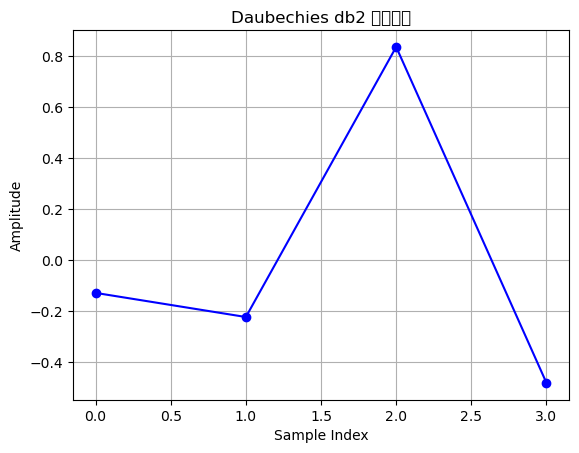

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# 選擇Daubechies小波的order
order = 2

# 創建Daubechies小波的實例
wavelet = pywt.Wavelet(f'db{order}')

# 獲取小波函數的支持區域
x = np.linspace(0, wavelet.dec_len - 1, wavelet.dec_len)
y = wavelet.dec_hi[::-1]  # dec_hi包含小波函數的高通濾波器係數

# 繪製小波函數的圖形
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title(f'Daubechies db{order} 小波函數')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

In [5]:
class A:
    def __init__(self):
        super().__init__()
        print('A')
        self.a = 1


# class B:
#     def __init__(self):
#         super().__init__()
#         print('B')
#         self.b = 2


# class C(A, B):
#     def __init__(self):
#         super().__init__()
#         print('C')
# a = C()
b = A()

A


ModuleNotFoundError: No module named 'data.dataset'

In [2]:
import SimpleITK as sitk
import numpy as np
import torch
from scipy.ndimage import binary_dilation, gaussian_filter
import shutil
from nilearn.image import reorder_img, resample_to_img, resample_img
import nibabel as nib
import glob
import os
import random
from os.path import basename, join, dirname, abspath, isdir
from synthseg.tool import *
device = ('cuda' if torch.cuda.is_available() else 'cpu')
a = torch.tensor([[1,1],[1,2]])

def DeepSupervisionloss(loss_function, output, mask, deep_supervision_num):
    
    weights = np.array([1 / (2 ** i) for i in range(deep_supervision_num)])
    weights[-1] = 0
    weights = weights / weights.sum()
    return sum([weights[i] * loss_function(*inputs, 'dicesoftmax') for i, inputs in enumerate(zip(output, mask)) if weights[i] != 0.0])
print(DeepSupervisionloss(get_loss, [a,a],[a,a], 2))

tensor([[1, 1],
        [1, 2]]) tensor([[1, 1],
        [1, 2]])


RuntimeError: "softmax_lastdim_kernel_impl" not implemented for 'Long'

In [25]:
output = [1,2,3]
mask = [2,3,4]
print([inputs for i, inputs in enumerate(zip(output, mask))] )

[(1, 2), (2, 3), (3, 4)]


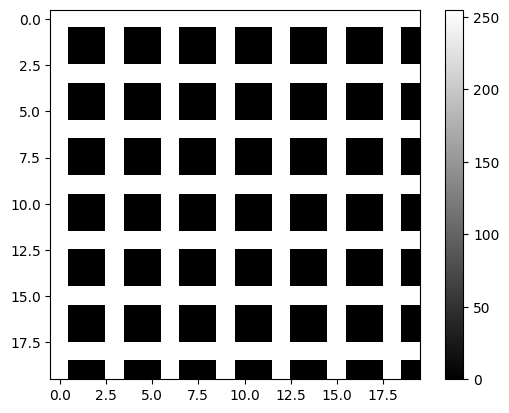

torch.Size([1, 20, 20, 20])


/opt/conda/lib/python3.10/site-packages/torchio/transforms/augmentation/spatial/random_elastic_deformation.py:303: RuntimeWarning: The maximum displacement is larger than the coarse grid spacing for dimensions: [0, 1, 2], so folding may occur. Choose fewer control points or a smaller maximum displacement
  self.parse_free_form_transform(


Text(0.5, 1.0, 'ima')

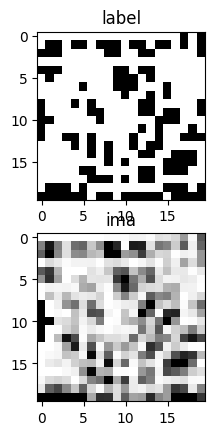

In [26]:
import numpy as np
import os, random
import torchio as tio
import matplotlib
array = np.zeros((20,20,20))
array[::3, :,:] = 255
array[:, ::3,:] = 255
array[:, :, ::3] = 255
plt.imshow(array[10], cmap='gray')
plt.colorbar()  # 添加颜色条
plt.show()
data = dict()
data['ima'] = array[None, ...]
data['label'] = array[None, ...]
temp = data
temp = tio.RandomElasticDeformation(label_keys=['label'], include=['ima','label'])(temp)
print(temp['label'].shape)
plt.subplot(2, 1, 1)
plt.imshow(temp['label'][0, 10, :,:], cmap='gray')
plt.title('label')

plt.subplot(2, 1, 2)
plt.imshow(temp['ima'][0, 10, :,:], cmap='gray')
plt.title('ima')